In [1]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
License(s): CC0-1.0
book-recommendation-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import zipfile

#unzip the files
with zipfile.ZipFile("book-recommendation-dataset.zip", "r") as ref:
    ref.extractall("Data_Folder")

In [3]:
# import packages and Libarys
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings as w
w.filterwarnings('ignore')
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
books = pd.read_csv('Data_Folder/Books.csv')
users = pd.read_csv('Data_Folder/Users.csv')
ratings = pd.read_csv('Data_Folder/Ratings.csv')

## Exploratory Data Analysis

In [6]:
# books 
print('shape of books ',books.shape)
print()
books.info()

shape of books  (271360, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
# user 
print('shape of users',users.shape)
print()
users.info()

shape of users (278858, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
# ratings
print('shape of rating',ratings.shape)
print()
ratings.info()

shape of rating (1149780, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


<Axes: xlabel='Book-Rating'>

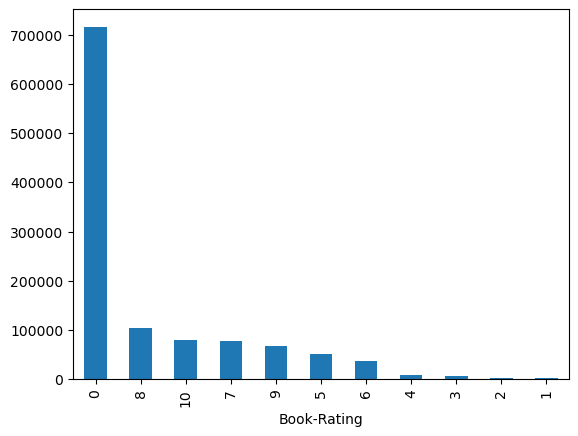

In [9]:
ratings["Book-Rating"].value_counts().plot(kind = "bar")

In [10]:
#find missing values in books
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
#drop the missing value
books.dropna(inplace=True)

In [12]:
#duplicate values
books.duplicated().sum()

0

In [13]:
books["Year-Of-Publication"].value_counts(
    
).index.values

array([2002, 2001, 1999, 2000, 1998, 2003, 1997, 1996, 1995, 1994, 1993,
       1992, 1991, 1990, 1989, 1988, 1987, 2004, 1986, '1999', 1985,
       '2000', '2002', '1998', '2001', 1984, 0, '1997', '1996', 1983,
       '1995', 1982, '1994', '2003', '1993', '1992', '1991', 1981, '1990',
       '1989', '1988', 1980, '1987', '1986', 1979, 1978, '1985', 1977,
       '1984', '2004', '1983', 1976, '1982', '0', '1981', 1975, '1980',
       1974, '1979', 1973, '1978', 1972, '1977', '1976', '1975', 1971,
       '1974', 1970, '1973', 1969, '1972', '1971', 1968, '1970', 1966,
       1967, 1965, 1964, '1969', 1963, 1960, 1961, 1962, 1959, '1968',
       1958, 1957, '1965', 1953, 1955, '1960', 1956, '1961', 1954, '1966',
       '1962', '1967', '1963', '1964', 1951, 2005, 1940, '1959', '1956',
       1920, '1957', '1955', 1952, 1950, '1958', '2005', '1953', 1942,
       1930, 1946, '1952', 1947, 1911, '1911', '1951', '1950', 1949, 1941,
       '1940', '1954', 1923, 1939, 1901, 1929, 1938, 1948, 1943

In [14]:
# Step 1: Filter out invalid or non-year values
valid_years = books['Year-Of-Publication'].astype(str).str.isnumeric()
books = books[valid_years]

# Step 2: Convert the column data to integers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

# Step 3: Create a new datetime column from the integers representing years
books['Publication_Date'] = pd.to_datetime(books['Year-Of-Publication'], format='%Y', errors='coerce')

# Drop the old 'Year-Of-Publication' column if you don't need it anymore
books.drop(columns=['Year-Of-Publication'], inplace=True)

# Display the DataFrame to check the new datetime column
books = pd.DataFrame(books)


In [15]:
# Step 4: Create a new column with only the year part as integers
books['Year-Of-Publication'] = books['Publication_Date'].dt.year

In [16]:
books['Year-Of-Publication'].value_counts().index.values

array([2002., 1999., 2001., 2000., 1998., 1997., 2003., 1996., 1995.,
       1994., 1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986.,
       2004., 1985., 1984., 1983., 1982., 1981., 1980., 1979., 1978.,
       1977., 1976., 1975., 1974., 1973., 1972., 1971., 1970., 1969.,
       1968., 1966., 1967., 1965., 1964., 1960., 1961., 1963., 1962.,
       1959., 1958., 1957., 1956., 1955., 1953., 1954., 2005., 1951.,
       1940., 1952., 1920., 1950., 1911., 1942., 1947., 1946., 1930.,
       1949., 1923., 1941., 1939., 1948., 1945., 1943., 1901., 1938.,
       2030., 1936., 1929., 1937., 1932., 1944., 1933., 1935., 2006.,
       1900., 1931., 2020., 1927., 1921., 1922., 1909., 2011., 1925.,
       1926., 2010., 1924., 1902., 2050., 1928., 1904., 2012., 2024.,
       1897., 1919., 2008., 1934., 1910., 1806., 2021., 2038., 1906.,
       1908., 1914., 1917., 2026., 2037.])

In [55]:
# this all the invalid data at this time

books = books[(books['Year-Of-Publication'] != 2037)]
books = books[(books['Year-Of-Publication'] != 2026)] 
books = books[(books['Year-Of-Publication'] != 2030)]
books = books[(books['Year-Of-Publication'] != 2050)]
books = books[(books['Year-Of-Publication'] != 2038)]

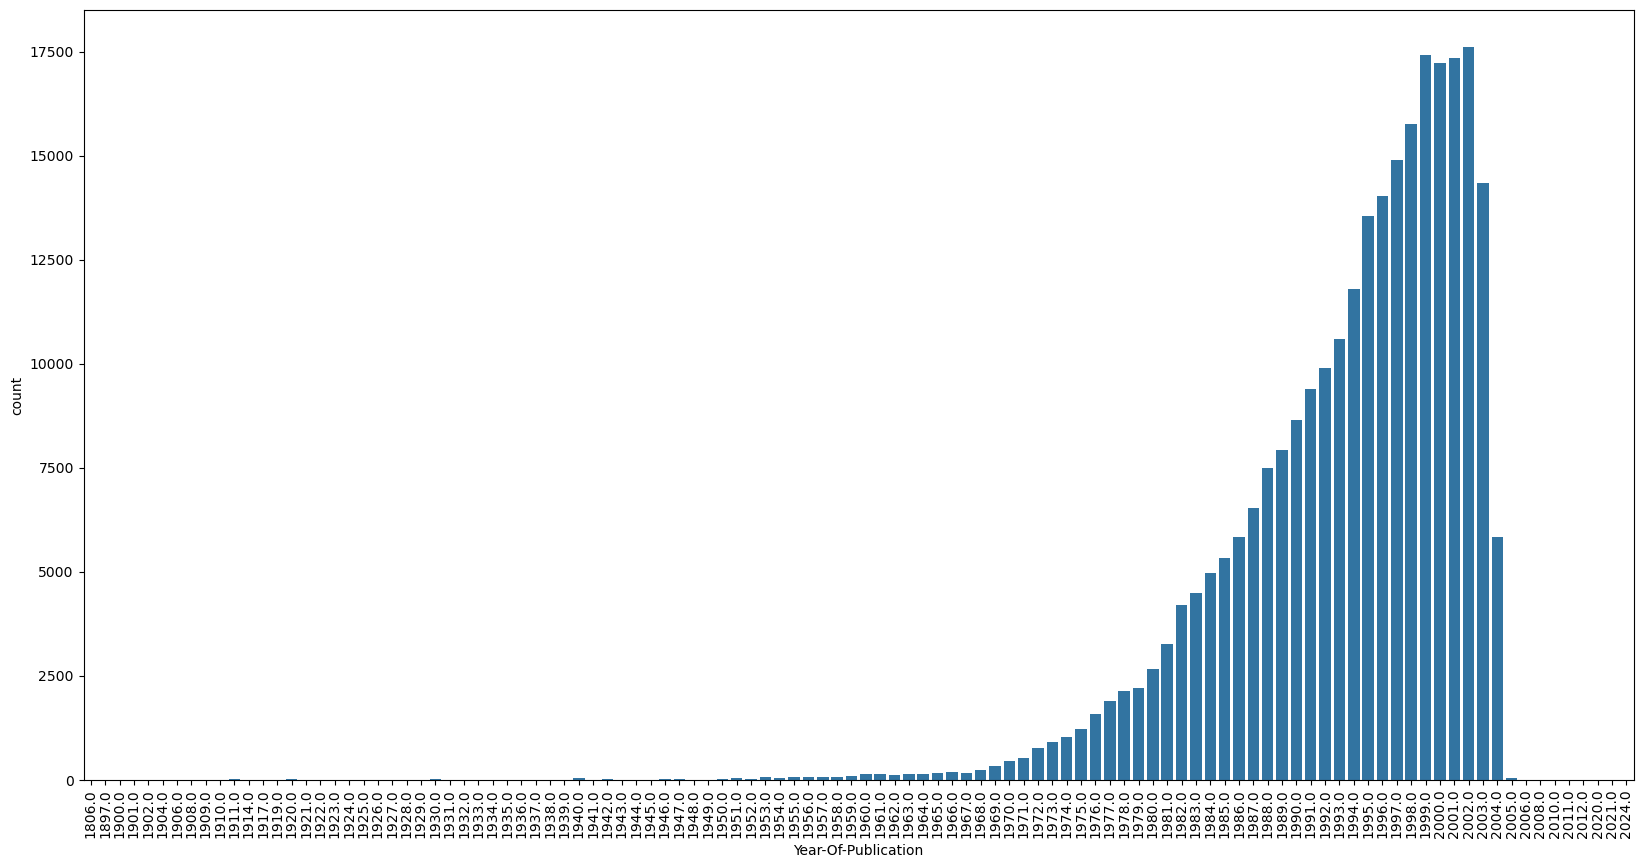

In [57]:
plt.figure(figsize=(20,10))
sns.countplot(x=books['Year-Of-Publication']);
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Publisher'>

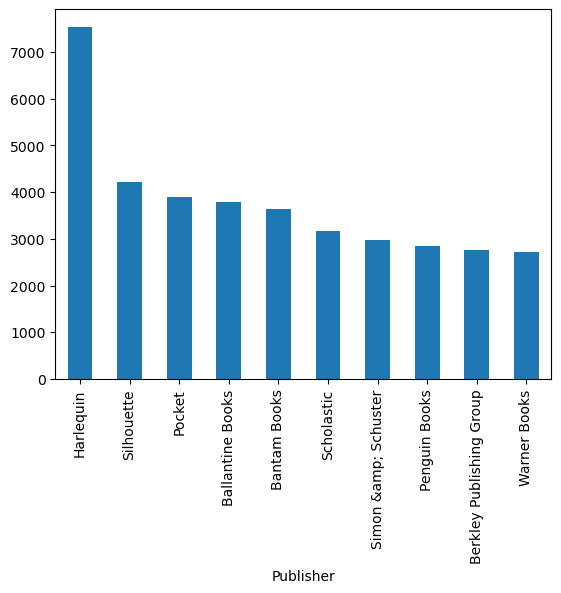

In [61]:
#Top ten publisher
books["Publisher"].value_counts().head(10).plot(kind = "bar")

In [65]:
# find the null values 
round(100*
(users.isnull().sum()/len(users.index))
      ,2)

User-ID      0.00
Location     0.00
Age         39.72
dtype: float64

In [69]:
# remove the age column
users.drop('Age',axis=1,inplace=True)

In [77]:
users['Location'] = users['Location'].apply(lambda x:x.split(',')[-1])

<Axes: xlabel='Location'>

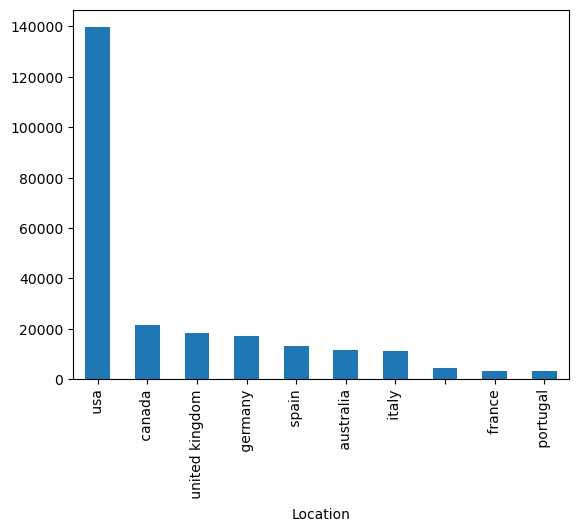

In [79]:
# top 10 user location 
users['Location'].value_counts().head(10).plot(kind='bar')

In [81]:
# null values 
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [83]:
# duplicate values
ratings.duplicated().sum()

0

## Popularity based recomender system

**we will display the Top 50 books with highest average rating but we will consider only those books who have got minimum 250 votes**

In [108]:
# merge the data ratings and books based on 'ISBN' columns

rating_books_name = ratings.merge(books,on='ISBN')

rating_books_name.head(2
                      )

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publication_Date,Year-Of-Publication
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,2002-01-01,2002.0
1,276726,0155061224,5,Rites of Passage,Judith Rae,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,2001-01-01,2001.0


In [99]:
# first of all groupby 'Book-Title' and find the totle number(count) of voting 
numer_rating = rating_books_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
numer_rating.rename(columns={'Book-Rating':'Totle_number_rating'},inplace=True)
numer_rating.head()

,Book-Title,Totle_number_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [101]:
# totle avg-rating
avg_rating = rating_books_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating.rename(columns={'Book-Rating':'Totle_avg_rating'},inplace=True)
avg_rating.head()

,Book-Title,Totle_avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [114]:
# merge the 'avg_rating' and 'number_rating' base on 'Book-Title'

popular_df = numer_rating.merge(avg_rating,on='Book-Title')
popular_df.head()

,Book-Title,Totle_number_rating,Totle_avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


**highest average rating but we will consider only those books who have got minimum 250 votes**

In [129]:
popular_df = popular_df[popular_df['Totle_number_rating'] >= 250].sort_values('Totle_avg_rating',ascending=False).head(50)
popular_df.head()

,Book-Title,Totle_number_rating,Totle_avg_rating
80425,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80413,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80432,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80417,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80405,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453


In [135]:
# merge the 'popular_df' and 'books' dataset 
# Books-Title have many duplicated values 
# drop_duplicated

popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author', 'Image-URL-M', 'Totle_number_rating','Totle_avg_rating']]
popular_df.head()

,Book-Title,Book-Author,Image-URL-M,Totle_number_rating,Totle_avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453


In [137]:
# this all the top 50 Books
popular_df.head()

,Book-Title,Book-Author,Image-URL-M,Totle_number_rating,Totle_avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453


## Collaborative Filtering Based Recommender System

### Step-1) Extract users and ratings of more than 200

In [155]:
x = ratings['User-ID'].value_counts() > 200
y = x[x].index
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727, 268622,
       188951],
      dtype='int64', name='User-ID', length=899)

In [157]:
print(y.shape)

(899,)


In [161]:
ratings = ratings[ratings['User-ID'].isin(y)]


### step-2) Merge ratings with books

In [164]:
rating_with_books = ratings.merge(books, on='ISBN')
rating_with_books.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publication_Date,Year-Of-Publication
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01,1994.0
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,1995-01-01,1995.0


### step-3) Extract books that have received more than 50 ratings.

In [167]:
number_rating = rating_with_books.groupby('Book-Title')['Book-Rating'].count().reset_index()
number_rating.rename(columns= {'Book-Rating':'number_of_ratings'}, inplace=True)
number_rating.head()

,Book-Title,number_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [175]:
final_rating = rating_with_books.merge(number_rating, on='Book-Title')


In [176]:
final_rating = final_rating[final_rating['number_of_ratings'] >= 50]
final_rating.drop_duplicates(['User-ID','Book-Title'], inplace=True)


### Step-4) Create Pivot Table

In [180]:
book_pivot = final_rating.pivot_table(columns='User-ID', index='Book-Title', values="Book-Rating")
book_pivot.fillna(0, inplace=True)

In [182]:
book_pivot

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling

In [185]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(book_pivot)

In [187]:
similarity_scores

array([[1.        , 0.08273808, 0.        , ..., 0.09601007, 0.0458244 ,
        0.03361581],
       [0.08273808, 1.        , 0.19488963, ..., 0.07010171, 0.16174155,
        0.15315244],
       [0.        , 0.19488963, 1.        , ..., 0.0432679 , 0.04617844,
        0.10992264],
       ...,
       [0.09601007, 0.07010171, 0.0432679 , ..., 1.        , 0.07085128,
        0.03898126],
       [0.0458244 , 0.16174155, 0.04617844, ..., 0.07085128, 1.        ,
        0.13208788],
       [0.03361581, 0.15315244, 0.10992264, ..., 0.03898126, 0.13208788,
        1.        ]])

In [189]:
similarity_scores.shape

(742, 742)

In [191]:
# this is the first books distance each books similarity 
similarity_scores[0]

array([1.        , 0.08273808, 0.        , 0.        , 0.07477071,
       0.03673833, 0.        , 0.07368049, 0.09312385, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06190186,
       0.01884281, 0.06460814, 0.10244607, 0.05053814, 0.08722302,
       0.02344827, 0.        , 0.0919701 , 0.        , 0.12843214,
       0.07175744, 0.05680891, 0.06375014, 0.        , 0.05037691,
       0.11085206, 0.05842187, 0.10602363, 0.06137039, 0.05217099,
       0.        , 0.        , 0.06725339, 0.04260475, 0.        ,
       0.        , 0.09462344, 0.07771828, 0.        , 0.        ,
       0.05739762, 0.10825455, 0.        , 0.03177217, 0.0744179 ,
       0.06814891, 0.0747601 , 0.02958686, 0.0508376 , 0.26945967,
       0.0562573 , 0.08493312, 0.1105367 , 0.10892904, 0.07033842,
       0.039704  , 0.        , 0.        , 0.0359186 , 0.        ,
       0.0544709 , 0.03459765, 0.13404582, 0.        , 0.        ,
       0.        , 0.03799022, 0.09737684, 0.12774137, 0.     

In [193]:
def recommend(book_name):
    # index fetch
    index = np.where(book_pivot.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == book_pivot.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [195]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg']]